In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('chained_assignment', None)
pd.set_option('display.max_columns', 100)
import seaborn as sns

In [2]:
df = pd.read_csv('../final.csv',)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
# Data-Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   record        3485 non-null   int64  
 1   estab_numb    3485 non-null   float64
 2   urn           3485 non-null   int64  
 3   school_name   3485 non-null   object 
 4   town          3485 non-null   object 
 5   postcode      3485 non-null   object 
 6   school_type1  3485 non-null   object 
 7   religion      3485 non-null   object 
 8   gender        3485 non-null   object 
 9   total_pupils  3485 non-null   int64  
 10  disadvantage  3485 non-null   float64
 11  eal           3485 non-null   float64
 12  att8_score    3485 non-null   float64
 13  att8_ebacc    3485 non-null   float64
 14  la_name       3485 non-null   object 
 15  la_code       3485 non-null   int64  
 16  status        3485 non-null   object 
 17  school_type2  3485 non-null   object 
 18  school_type3  3485 non-null 

In [4]:
# Data-Distribution
df.describe()

,record,estab_numb,urn,total_pupils,disadvantage,eal,att8_score,att8_ebacc,la_code,sen,fsm,per_abs
count,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000,3485.000000
mean,1.099570,4837.861119,131899.628694,926.922238,39.731133,24.630416,42.945050,12.342984,675.094118,28.293831,134.160976,6.465940
std,0.299468,1081.079300,12773.699088,460.270186,27.179502,36.628288,15.360863,4.801355,270.490464,42.757604,99.893590,3.981335
min,1.000000,2006.000000,100049.000000,18.000000,0.000000,0.000000,0.000000,0.000000,202.000000,0.000000,1.000000,1.800000
25%,1.000000,4026.000000,125458.000000,629.000000,19.000000,3.000000,39.500000,10.900000,352.000000,8.000000,61.000000,4.800000
50%,1.000000,4226.000000,137090.000000,934.000000,35.000000,9.000000,45.100000,12.900000,840.000000,15.000000,108.000000,5.600000
75%,1.000000,5406.000000,139655.000000,1234.000000,54.000000,29.000000,50.800000,14.800000,888.000000,27.000000,182.000000,6.700000
max,2.000000,7511.000000,146624.000000,2953.000000,194.000000,258.000000,85.200000,26.300000,938.000000,405.000000,919.000000,49.600000


In [5]:
# Sample Data
df.sample(5)

,record,estab_numb,urn,school_name,town,postcode,school_type1,religion,gender,total_pupils,disadvantage,eal,att8_score,att8_ebacc,la_name,la_code,status,school_type2,school_type3,sen,fsm,per_abs
1024,2,7015.0,135547,Stone Hill School,Doncaster,DN5 7UB,CYS,Does not apply,MIXED,130,4.0,1.0,1.2,0.0,Doncaster,371,Open,Special school,Community special school,130.0,37.0,5.3
355,1,4025.0,143877,The Royal Liberty School,Romford,RM2 6HJ,ACC,None,BOYS,593,31.0,17.0,47.6,14.6,Havering,311,Open,Academy,Academy converter,10.0,78.0,4.6
3403,2,7061.0,146255,The Abbey School,Farnham,GU9 8DY,ACCS,Does not apply,MIXED,107,7.0,0.0,1.3,0.0,Surrey,936,Open,Special school,Academy special converter,107.0,29.0,4.4
171,1,4028.0,141683,The Sydney Russell School,Dagenham,RM9 5QT,ACC,Does not apply,MIXED,2275,131.0,69.0,50.1,14.0,Barking and Dagenham,301,Open,Academy,Academy converter,28.0,368.0,4.1
3458,1,4012.0,142089,The Burgess Hill Academy,Burgess Hill,RH15 9EA,AC,Does not apply,MIXED,800,18.0,6.0,43.0,12.0,West Sussex,938,Open,Academy,Academy sponsor led,10.0,62.0,5.6


### Numerical Data Profiling

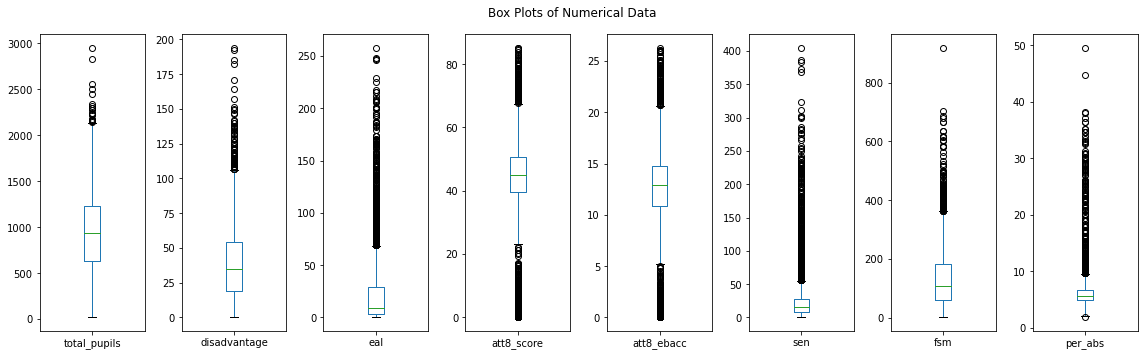

In [6]:
# Outlier detection using box-plot
df[['total_pupils', 'disadvantage', 'eal', 'att8_score', 'att8_ebacc', 'sen', 'fsm', 'per_abs']].plot(kind='box', subplots=True, figsize=(16,5), title='Box Plots of Numerical Data')
plt.tight_layout()

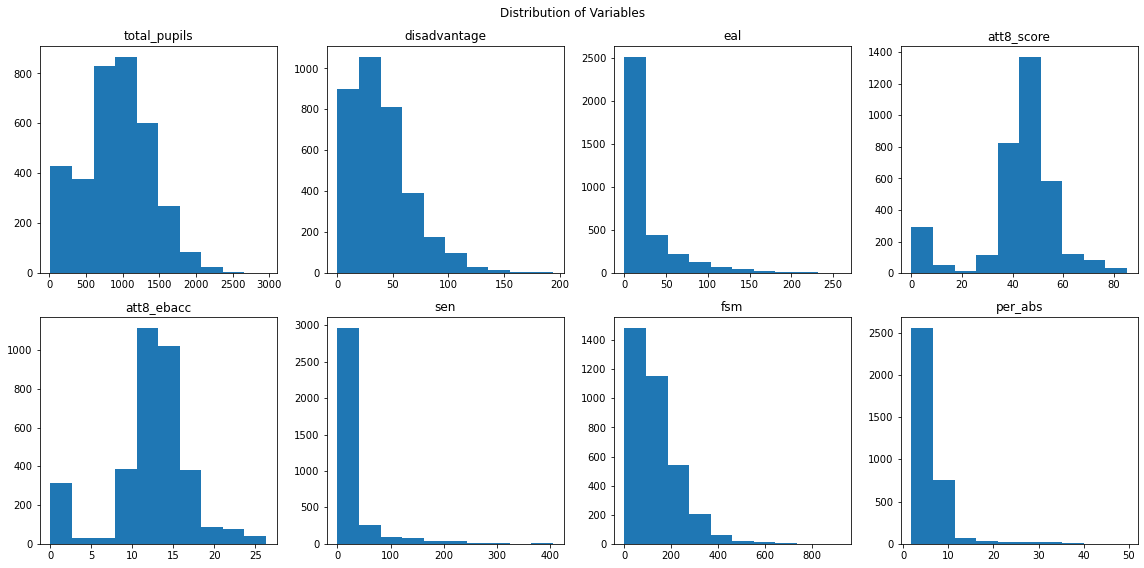

In [7]:
# Each variable/column distribution plot
ndf = df[['total_pupils', 'disadvantage', 'eal', 'att8_score', 'att8_ebacc', 'sen', 'fsm', 'per_abs']]

fig, ((ax11, ax12, ax13, ax14), (ax21, ax22, ax23, ax24)) = plt.subplots(2, 4, figsize=(16,8))

fig.suptitle('Distribution of Variables')

ax11.hist(ndf['total_pupils'])
ax11.set_title('total_pupils')

ax12.hist(ndf['disadvantage'])
ax12.set_title('disadvantage')

ax13.hist(ndf['eal'])
ax13.set_title('eal')

ax14.hist(ndf['att8_score'])
ax14.set_title('att8_score')

ax21.hist(ndf['att8_ebacc'])
ax21.set_title('att8_ebacc')

ax22.hist(ndf['sen'])
ax22.set_title('sen')

ax23.hist(ndf['fsm'])
ax23.set_title('fsm')

ax24.hist(ndf['per_abs'])
ax24.set_title('per_abs')

fig.tight_layout()

Text(0.5, 1.0, 'Correlation Map of Numerical Data')

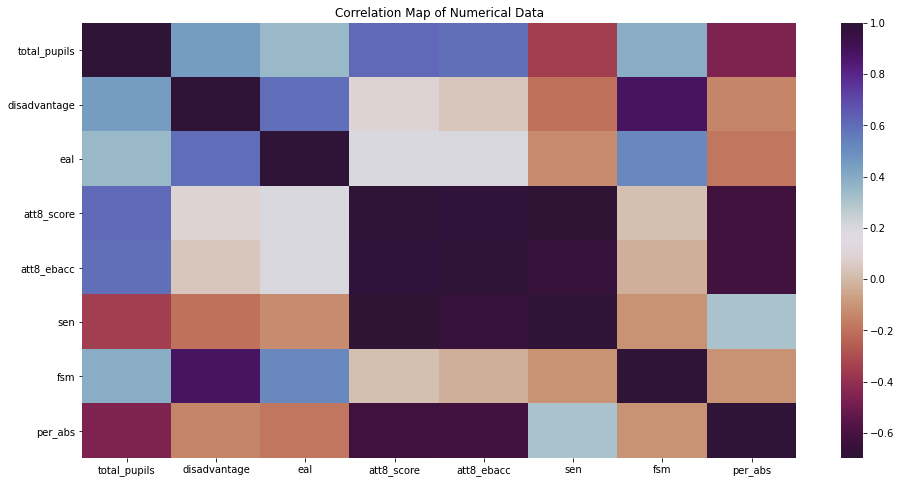

In [73]:
## Correlation Map of Numerical Data
corr = ndf.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap='twilight_shifted_r')
plt.title('Correlation Map of Numerical Data')

### Categorical Data Profiling

In [26]:
import plotly.express as px
import plotly.graph_objects as go

In [70]:
## Distribution of School Type1 column

data = df['school_type1'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 1</b> Pie Chart'))
fig.show()

In [69]:
## Distribution of School Type2 column

data = df['school_type2'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 2</b> Pie Chart'))
fig.show()

In [68]:
## Distribution of School Type3 column

data = df['school_type3'].value_counts()
labels = data.index.tolist()
values = data.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(dict(title='<b>School Type 3</b> Pie Chart'))
fig.show()

In [67]:
# Histogram for gender column

fig = px.histogram(df, x="gender", title='Distribution of <b style="color:orangered">Gender</b> Column', color_discrete_sequence=['orangered'])
fig.show()

In [64]:
# Histogram for la_name column

fig = px.histogram(df, x="la_name", title='Data Distribution of <b>la_name</b> Column', color_discrete_sequence=['orange'])
fig.show()

In [59]:
# Histogram for town column

fig = px.histogram(df, x="town", title='Data Distribution of <b>town</b> Column', color_discrete_sequence=['orange'])
fig.show()